In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA



In [2]:
X, _ =make_blobs(n_samples= 300, centers= 3, random_state= 2024)
df_raw = pd.DataFrame(X, columns= ["x","y"])
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [3]:
#EDA
df = df_raw.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,300.0,-3.463733,3.842370,-9.657696,-6.402874,-5.367757,1.060328,3.575209
y,300.0,-4.341295,6.108935,-12.454461,-9.120832,-7.524914,3.539383,6.681679


<function matplotlib.pyplot.show(close=None, block=None)>

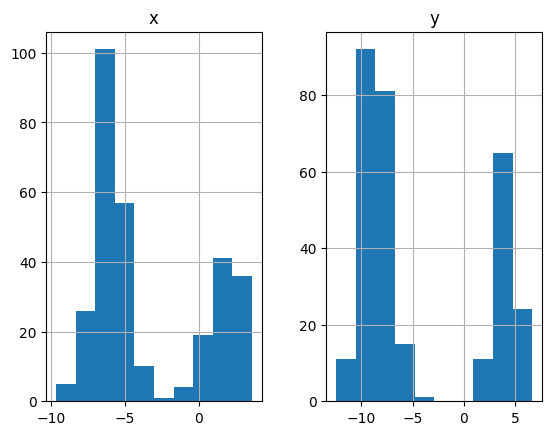

In [4]:
#visualization
df.hist()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

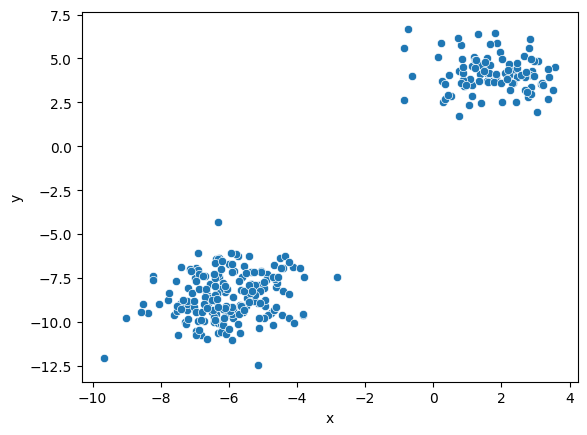

In [5]:
sns.scatterplot(data = df, x="x", y="y")
plt.show

In [6]:
scaler = StandardScaler()
X_scaled =scaler.fit_transform(df)
X_scaled

array([[-0.90897378, -0.42813105],
       [ 1.26384366,  1.38917041],
       [-0.30362524, -0.60421383],
       [ 1.20027255,  1.28204937],
       [-0.42914431, -0.58324088],
       [-0.64793586, -0.80794932],
       [ 1.18327882,  1.34418286],
       [-1.04682949, -1.04921327],
       [ 1.37562047,  1.76812319],
       [-0.59076986, -0.31057767],
       [-0.83478218, -0.63777185],
       [-0.73339313, -0.50810307],
       [-0.55588361, -0.83782539],
       [-1.19523997, -0.7655939 ],
       [ 1.42993717,  1.12114908],
       [ 1.72667551,  1.29141987],
       [-0.24582149, -0.64331786],
       [-0.71376044, -1.00523049],
       [-0.76536807, -0.81469002],
       [ 1.82174491,  1.23887884],
       [-0.85465568, -0.92457984],
       [ 0.97065329,  1.31922841],
       [-0.65581747, -0.86862245],
       [-0.57944433, -0.77214005],
       [ 1.4161385 ,  1.59576965],
       [-0.62894314, -0.89331498],
       [-0.62433811, -0.45541574],
       [-1.07878155, -0.86286611],
       [ 1.51571522,

In [7]:
df_scaled = pd.DataFrame(X_scaled, columns= ['x_scaled', 'y_scaled'])
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
x_scaled,300.0,-8.289665e-17,1.001671,-1.614710,-0.766207,-0.496362,1.179381,1.834988
y_scaled,300.0,-4.144833e-17,1.001671,-1.330301,-0.783692,-0.522012,1.292180,1.807417


In [8]:
model = KMeans(n_clusters=4, random_state=2024)
model.fit(X)

KMeans(n_clusters=4, random_state=2024)

In [9]:
cluster = model.predict(X)
cluster

array([0, 1, 3, 1, 0, 3, 1, 2, 1, 0, 0, 0, 3, 2, 1, 1, 3, 2, 2, 1, 2, 1,
       3, 3, 1, 3, 0, 2, 1, 3, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0,
       3, 2, 1, 2, 1, 3, 0, 0, 2, 2, 3, 0, 1, 0, 2, 0, 0, 3, 3, 2, 1, 2,
       3, 1, 2, 3, 1, 1, 2, 0, 3, 1, 2, 0, 1, 0, 3, 2, 0, 0, 0, 2, 1, 2,
       3, 2, 2, 3, 2, 3, 1, 2, 1, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 2, 0, 1,
       1, 2, 0, 0, 0, 1, 1, 2, 0, 3, 1, 3, 0, 1, 2, 3, 0, 3, 0, 0, 2, 3,
       0, 1, 3, 1, 3, 1, 3, 2, 1, 0, 3, 0, 3, 0, 0, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 3, 0, 0, 3,
       0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 3, 3, 3, 1, 3, 0, 0, 3, 3, 0,
       1, 2, 0, 1, 0, 0, 1, 3, 1, 1, 2, 1, 1, 2, 3, 0, 1, 3, 2, 1, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 1, 0, 1, 0, 3, 3, 1, 0, 0, 3, 2, 2, 3, 1, 3,
       3, 2, 0, 2, 3, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 3, 1, 0, 0, 3, 2, 0,
       1, 1, 1, 0, 1, 3, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1,
       3, 0, 2, 2, 3, 3, 3, 0, 1, 1, 2, 1, 0, 2], d

In [10]:
df_final = df_scaled.copy()
df_final["cluster"] = cluster

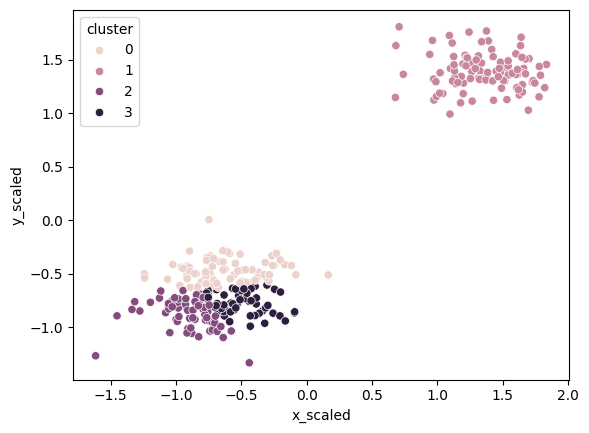

In [11]:
sns.scatterplot(data=df_final, x='x_scaled', y= 'y_scaled', hue='cluster')
plt.show()

In [12]:
X, _ = load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
X.columns = X.columns.str.replace(" ","_").str.replace(r"⁄W",'', regex=True)
X

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
sns.scatterplot(data=X, x='sepal_length_cm', y= 'sepal_width_cm')
plt.show()

ValueError: Could not interpret value `sepal_length_cm` for `x`. An entry with this name does not appear in `data`.

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled=pd.DataFrame(X_scaled, columns=["sepal_length_(cm)", "sepal_width_(cm)", "petal_length_(cm)", "petal_width_(cm)"])
df_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal_length_(cm),150.0,-4.736952e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepal_width_(cm),150.0,-7.815970e-16,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petal_length_(cm),150.0,-4.263256e-16,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
petal_width_(cm),150.0,-4.736952e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


In [19]:
Z = linkage(df_scaled,method="complete")
Z

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [2.90000000e+01, 1.57000000e+02, 1.70512281e-01, 3.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e

dendrogram(Z)

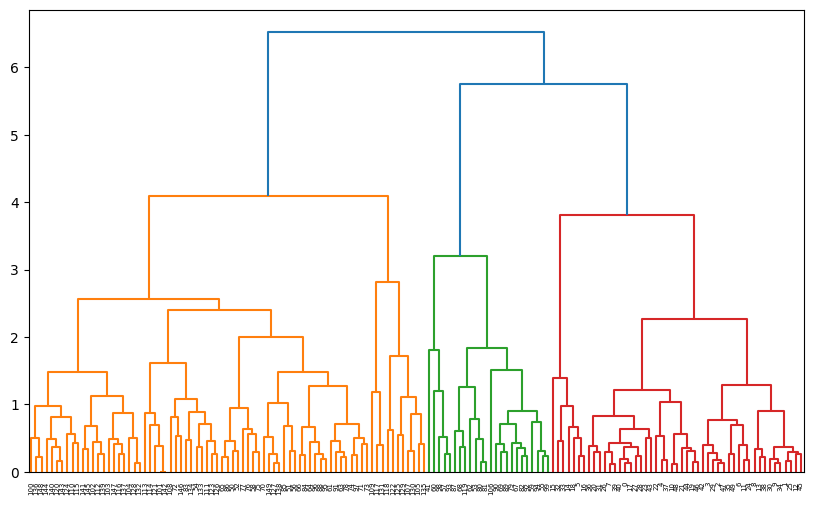

In [21]:
plt.figure(figsize=(10,6))
dendrogram(Z)
plt.show()

In [22]:
X

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
X.corr()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
sepal_length_(cm),1.000000,-0.117570,0.871754,0.817941
sepal_width_(cm),-0.117570,1.000000,-0.428440,-0.366126
petal_length_(cm),0.871754,-0.428440,1.000000,0.962865
petal_width_(cm),0.817941,-0.366126,0.962865,1.000000


In [24]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

In [25]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [26]:
df_pca = pd.DataFrame(data=X_pca, columns= ["PC1","PC2"])
df_pca

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [29]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [30]:
df_pca.corr()

,PC1,PC2
PC1,1.000000e+00,5.027752e-15
PC2,5.027752e-15,1.000000e+00
